In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import spacy

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

2023-07-05 12:12:09.388076: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 12:12:12.402206: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 12:12:12.414735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 12:12:23.078851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [58]:
train = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

df = pd.DataFrame(train)

In [59]:
print(df.dtypes)
print(" ============================================== ")
print(df.head(20))
print(" ============================================== ")
print(df.columns)
print(" ============================================== ")
print(df.info())
print(" ============================================== ")
print(df.shape)
print(" ============================================== ")
print(data.values)

id        int64
label     int64
tweet    object
dtype: object
    id  label                                              tweet
0    1      0   @user when a father is dysfunctional and is s...
1    2      0  @user @user thanks for #lyft credit i can't us...
2    3      0                                bihday your majesty
3    4      0  #model   i love u take with u all the time in ...
4    5      0             factsguide: society now    #motivation
5    6      0  [2/2] huge fan fare and big talking before the...
6    7      0   @user camping tomorrow @user @user @user @use...
7    8      0  the next school year is the year for exams.ð...
8    9      0  we won!!! love the land!!! #allin #cavs #champ...
9   10      0   @user @user welcome here !  i'm   it's so #gr...
10  11      0   â #ireland consumer price index (mom) climb...
11  12      0  we are so selfish. #orlando #standwithorlando ...
12  13      0  i get to see my daddy today!!   #80days #getti...
13  14      1  @user #cnn ca

Cleaning Process

1. Dropping id column
2. Removing @user 
3. removing puncation, numbers, special characters
4. Removing words less than length 3 (optional)
(a faster to do this might be np.vectorize)

In [60]:
df.drop(["id"], axis=1)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [61]:
# removing @user
df['clean'] = df['tweet'].str.replace("@[\w]*", " ", regex=True)

# removing special character
df['clean'] = df['tweet'].str.replace("[^a-zA-Z]", " ", regex=True)

STEMMING PROCESS

- DIVIDING sentence in to list of words
- REMPVING stop words
- STEMMING
- JOINING to create a sentence

In [62]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function to stem a text
def stem_text(text):
    word_tokens = nltk.word_tokenize(text)
    filtered_token = [w for w in word_tokens if not w.lower() in stop_words]
    stemmed_words = [stemmer.stem(word) for word in filtered_token]
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text


df["stemmed"] = df["clean"].apply(stem_text)

In [63]:
print(df.head(20))

    id  label                                              tweet  \
0    1      0   @user when a father is dysfunctional and is s...   
1    2      0  @user @user thanks for #lyft credit i can't us...   
2    3      0                                bihday your majesty   
3    4      0  #model   i love u take with u all the time in ...   
4    5      0             factsguide: society now    #motivation   
5    6      0  [2/2] huge fan fare and big talking before the...   
6    7      0   @user camping tomorrow @user @user @user @use...   
7    8      0  the next school year is the year for exams.ð...   
8    9      0  we won!!! love the land!!! #allin #cavs #champ...   
9   10      0   @user @user welcome here !  i'm   it's so #gr...   
10  11      0   â #ireland consumer price index (mom) climb...   
11  12      0  we are so selfish. #orlando #standwithorlando ...   
12  13      0  i get to see my daddy today!!   #80days #getti...   
13  14      1  @user #cnn calls #michigan middle

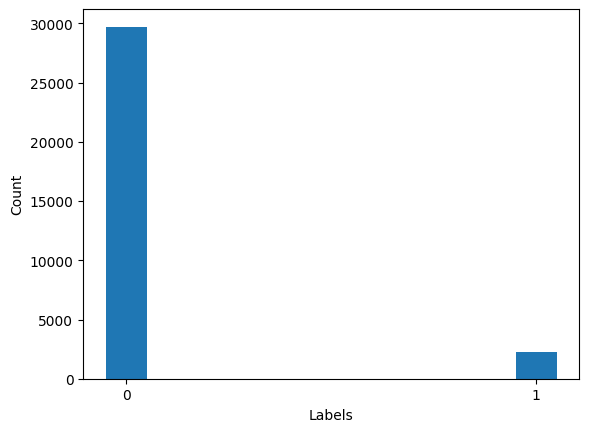

In [64]:
# Bar graph

y = np.array(df["label"].value_counts())
x = np.array([0, 1])

plt.bar(x, y, width = 0.1)

plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(x, x)

plt.show()

Creating 2 WordCloud

1. one for positive words
2. another for negative words

In [14]:
all_positive_word = " ".join(text for text in df["stemmed"][df["label"]==0])

In [ ]:
print(all_positive_word)

In [15]:
from nltk import FreqDist

words = all_positive_word.split()
fdist1 = FreqDist(words)


for i in range(20):
    print(fdist1.most_common()[i])


('user', 15719)
('love', 3209)
('day', 2907)
('happi', 2094)
('thank', 1537)
('amp', 1478)
('time', 1233)
('get', 1208)
('life', 1169)
('u', 1164)
('go', 1117)
('like', 1105)
('today', 1089)
('posit', 990)
('father', 951)
('make', 949)
('new', 931)
('smile', 928)
('bihday', 889)
('good', 858)


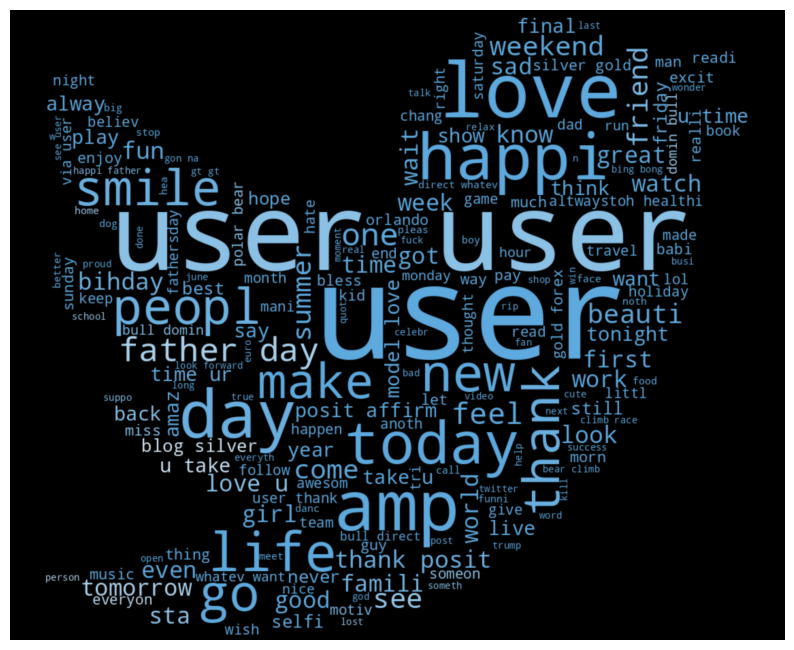

In [16]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_positive_word)

plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [17]:
all_negative_words = " ".join(text for text in df["stemmed"][df["label"]==1])

In [48]:
print(all_negative_words)

cnn call michigan middl school build the wall chant tcot no comment in australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin retweet if you agre lumpi say i am a prove it lumpi it s unbeliev that in the st centuri we d need someth like thi again neverump xenophobia let fight against love peac the white establish can t have blk folx run around love themselv and promot our great hey white peopl you can call peopl white by race ident med how the altright use amp insecur to lure men into whitesupremaci i m not interest in a linguist that doesn t address race amp racism is about power raciolinguist bring whi not mock obama for be black brexit peopl aren t protest trump becaus a republican won they do so becaus trump ha fuher amp ye it s when you call michelleobama a gorilla becaus racist have long thought of black peopl as no bet as the smaller hand show barri probabl lie about be whi hi knick game suck more than hi golf you point one finger million are point right back 

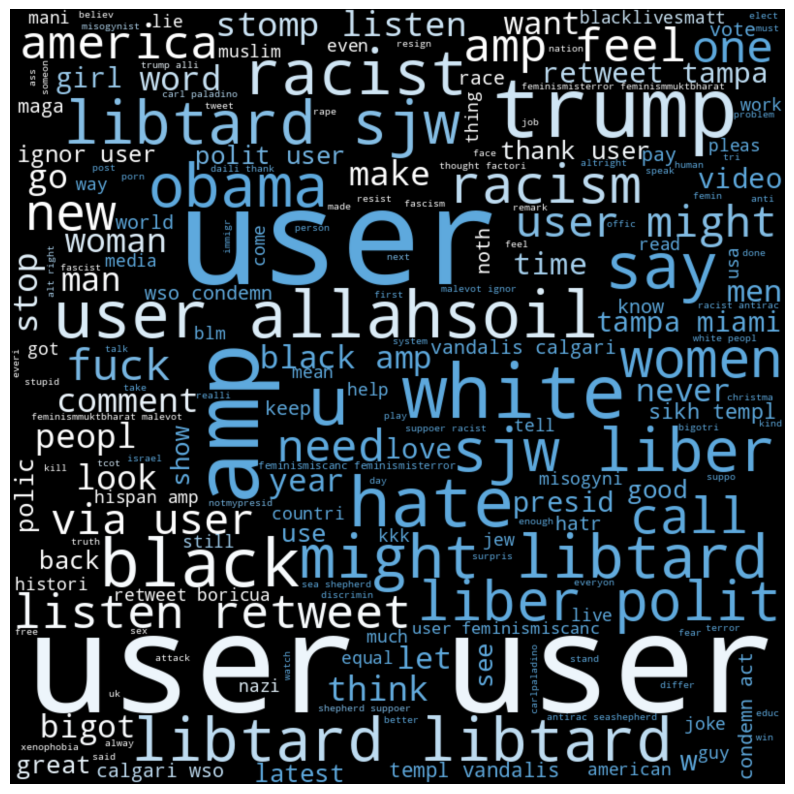

In [19]:
wc = WordCloud(background_color='black', height=800, width=800).generate(all_negative_words)

plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

There are 2 ways to solve this:

- Bag of words
- TfidfVectorizer

Create BAG OF WORDS

- CountVectorization
- Train/Test Dataset
- Model
- Predication

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_df=0.85, min_df=10, max_features=5000)

vect_stem = vectorizer.fit_transform(df['stemmed'])

vect_stem.todense()

(31962, 2961)


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [67]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(vect_stem, df['label'], test_size=0.3, random_state=2)


In [69]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_bow, y_train_bow)

/home/lucifer/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [72]:
prediction_bow = Log_Reg.predict_proba(x_test_bow)

prediction_bow

array([[9.83340248e-01, 1.66597517e-02],
       [9.99772731e-01, 2.27269173e-04],
       [9.48005861e-01, 5.19941393e-02],
       ...,
       [9.74087582e-01, 2.59124180e-02],
       [9.67429241e-01, 3.25707588e-02],
       [9.51257782e-01, 4.87422182e-02]])

In [74]:
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_test_bow, prediction_int)

log_bow

/tmp/ipykernel_7355/4173761143.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


0.6388443017656501

Create TfidfVectorizer

Train/Test Dataset

Model

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=5000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['stemmed'])

tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, df['label'],test_size=0.3,random_state=17)


In [82]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

prediction_tfidf = Log_Reg.predict_proba(x_test_tfidf)

prediction_tfidf

prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_test_tfidf, prediction_int)

log_tfidf

/tmp/ipykernel_7355/3800069480.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


0.6618962432915921